In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import joblib
import DiadFit as pf
pf.__version__

'0.0.34'

In [2]:
DayFolder=r'G:\My Drive\Berkeley_NEW\DiadFit_outer\docs\Examples\Diad_Fitting_Nov22nd2022'
meta_path=DayFolder +  '\MetaData'
spectra_path=DayFolder + '\Spectra'

## Load in specra, and combine

In [3]:
grp1=pd.read_excel('Weak_Diads.xlsx')
grp2=pd.read_excel('strong_Diads.xlsx')
grp3=pd.read_excel('Med_Diads.xlsx')
df2=pd.concat([grp1, grp2, grp3], axis=0)
df2.head()

,Unnamed: 0,filename,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Voigt_Gamma,Residual_Diad1,...,Residual_Diad2,Diad2_Prop_Lor,Diad2_fwhm,Diad2_refit,HB1_Cent,HB1_Area,HB2_Cent,HB2_Area,C13_Cent,C13_Area
0,0,POC58,102.727425,1286.718255,119.573726,1286.718255,154.419207,0.606601,NaN,2.282336,...,2.026593,7.381800e-02,1.135002,False,NaN,0.0,NaN,0.0,NaN,0.0
1,0,POC56,102.729331,1286.714106,131.751518,1286.714106,174.262314,0.621278,NaN,2.924421,...,2.812965,3.684211e-01,1.028093,False,NaN,0.0,NaN,0.0,NaN,0.0
2,0,POC57-0.04,102.757676,1286.687839,127.269559,1286.687839,161.499927,0.596054,NaN,2.423680,...,5.291010,1.580404e-01,1.130122,False,NaN,0.0,NaN,0.0,NaN,0.0
3,0,POC55,102.728191,1286.707301,157.393742,1286.707301,210.778870,0.629039,NaN,2.895239,...,2.884913,9.346591e-10,1.146632,False,NaN,0.0,NaN,0.0,NaN,0.0
4,0,POC51,102.740746,1286.696529,183.276230,1286.696529,250.703563,0.607511,NaN,2.697510,...,2.725495,1.662824e-01,1.163020,False,NaN,0.0,NaN,0.0,NaN,0.0


In [4]:
grp3['Splitting']

0     102.807493
1     103.125188
2     102.811074
3     103.668592
4     103.190317
5     102.833760
6     103.765313
7      79.743010
8     103.393388
9     103.454933
10    103.503617
11    103.270728
12    103.872186
13    103.546446
14    103.365314
15    103.600222
16    102.859011
17    103.960860
18    102.885342
19    104.250353
20    104.025934
21    104.068176
22    102.920007
23    104.305855
24    104.383364
25    104.108175
26    104.133860
27    102.951718
28    104.163485
29    102.977840
30    103.019073
Name: Splitting, dtype: float64

## Combine with charlottes data

In [5]:
df_D=pd.read_excel('Fityk_results.xlsx', sheet_name='112820_FULL') 

## Compare

## First, get the metadata for this day

In [6]:
# Put the common string you can in all your Ne lines here
ID_str='_'
file_ext_meta='txt' # Will only take files of this type 
diad_meta=pf.get_diad_files(path=meta_path,
file_ext='txt', exclude_str='N', 
            exclude_str_2='FG', 
            exclude_str_3='Cap',
                            exclude_str_4='window',
            exclude_type='.png',   sort=True)
diad_meta

['POC1.txt',
 'POC10.txt',
 'POC11.txt',
 'POC12.txt',
 'POC13.txt',
 'POC14.txt',
 'POC15.txt',
 'POC16.txt',
 'POC17.txt',
 'POC18.txt',
 'POC19.txt',
 'POC2.txt',
 'POC20.txt',
 'POC21.txt',
 'POC22.txt',
 'POC23.txt',
 'POC24.txt',
 'POC25.txt',
 'POC26.txt',
 'POC27.txt',
 'POC28.txt',
 'POC29.txt',
 'POC3.txt',
 'POC30.txt',
 'POC31.txt',
 'POC32.txt',
 'POC33.txt',
 'POC34.txt',
 'POC35.txt',
 'POC36.txt',
 'POC37.txt',
 'POC38.txt',
 'POC39.txt',
 'POC4.txt',
 'POC40.txt',
 'POC41.txt',
 'POC42.txt',
 'POC43.txt',
 'POC44.txt',
 'POC45.txt',
 'POC46.txt',
 'POC47.txt',
 'POC48.txt',
 'POC49.txt',
 'POC5.txt',
 'POC50.txt',
 'POC51.txt',
 'POC52.txt',
 'POC53.txt',
 'POC54.txt',
 'POC55.txt',
 'POC56.txt',
 'POC57-0.04.txt',
 'POC58.txt',
 'POC6.txt',
 'POC7.txt',
 'POC8.txt',
 'POC9.txt']

## Now get all the important information out of the metadata files

In [7]:
meta=pf.stitch_metadata_in_loop(path=meta_path, 
Allfiles=diad_meta, prefix=False,
trupower=False)
meta['filename'].iloc[0]

100%|██████████████████████████████████████████████████████████████████████████████████| 58/58 [00:01<00:00, 31.94it/s]

Done
Oof, try not to work after midnight!


'POC49.txt'

## Then get a simple file name you can stitch with the spectra

In [8]:
file_m=pf.extracting_filenames_generic(names=meta['filename'],
    prefix=False, str_prefix=" ",
   file_type='.txt')
# Checks they are all unique
file_m[0]

'POC49'

## Now get filename from spectra into same form as metadata

In [9]:
# Remove these to get the pure file name
file_s=pf.extracting_filenames_generic(
    prefix=False, str_prefix=" ",
    names=df2['filename'].reset_index(drop=True),
   file_type='.txt')

file_s

array(['POC58', 'POC56', 'POC57-0.04', 'POC55', 'POC51', 'POC54', 'POC53',
       'POC50', 'POC52', 'POC49', 'POC48', 'POC47', 'POC46', 'POC45',
       'POC44', 'POC43', 'POC42', 'POC41', 'POC40', 'POC8', 'POC1',
       'POC7', 'POC6', 'POC5', 'POC4', 'POC2', 'POC3', 'POC39', 'POC30',
       'POC38', 'POC20', 'POC29', 'POC37', 'POC19', 'POC25', 'POC26',
       'POC24', 'POC23', 'POC28', 'POC18', 'POC22', 'POC27', 'POC21',
       'POC36', 'POC17', 'POC35', 'POC11', 'POC16', 'POC15', 'POC34',
       'POC10', 'POC9', 'POC14', 'POC13', 'POC33', 'POC12', 'POC32',
       'POC31'], dtype=object)

In [10]:
# Combining them together
meta['name_for_matching']=file_m
df2['name_for_matching']=file_s
df_combo=df2.merge(meta, on='name_for_matching')

In [11]:
from pickle import load
import pickle
import os
pickle_path=os.getcwd()
file_pkl=pickle_path + '/' + 'Ne_Line_Regression_Example_cali.pck'
with open(file_pkl, 'rb') as file_handle:
    my_loaded_model = pickle.load(file_handle)

In [12]:
df_combo['Ne_Correction']=my_loaded_model(df_combo['sec since midnight'])
df_combo.insert(1,'Corrected_Splitting', df_combo['Ne_Correction']*df_combo['Splitting'])

In [13]:
df_combo

,Unnamed: 0,Corrected_Splitting,filename_x,Splitting,Diad1_Combofit_Cent,Diad1_Combofit_Height,Diad1_Voigt_Cent,Diad1_Voigt_Area,Diad1_Voigt_Sigma,Diad1_Voigt_Gamma,...,Day,power (mW),Int_time (s),accumulations,Mag (X),duration,24hr_time,sec since midnight,Spectral Center,Ne_Correction
0,0,102.790730,POC58,102.727425,1286.718255,119.573726,1286.718255,154.419207,0.606601,NaN,...,29.0,NaN,90.0,5.0,5.0,"['0h', '7m', '32s']",1:20:58 AM\n,91258.0,1341.0,1.000616
1,0,102.792470,POC56,102.729331,1286.714106,131.751518,1286.714106,174.262314,0.621278,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",1:01:55 AM\n,90115.0,1341.0,1.000615
2,0,102.820909,POC57-0.04,102.757676,1286.687839,127.269559,1286.687839,161.499927,0.596054,NaN,...,29.0,NaN,90.0,5.0,5.0,"['0h', '7m', '32s']",1:10:45 AM\n,90645.0,1341.0,1.000615
3,0,102.791266,POC55,102.728191,1286.707301,157.393742,1286.707301,210.778870,0.629039,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:54:26 AM\n,89666.0,1341.0,1.000614
4,0,102.803535,POC51,102.740746,1286.696529,183.276230,1286.696529,250.703563,0.607511,NaN,...,29.0,NaN,60.0,3.0,5.0,"['0h', '3m', '2s']",12:17:28 AM\n,87448.0,1341.0,1.000611
5,0,102.822214,POC54,102.759181,1286.683946,184.034094,1286.683946,242.334955,0.618523,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:46:57 AM\n,89217.0,1341.0,1.000613
6,0,102.823661,POC53,102.760690,1286.675363,220.627878,1286.675363,287.687395,0.602742,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '32s']",12:39:13 AM\n,88753.0,1341.0,1.000613
7,0,102.788804,POC50,102.726082,1286.691039,256.911938,1286.691039,340.578949,0.601709,NaN,...,29.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",12:09:42 AM\n,86982.0,1341.0,1.000611
8,0,102.797777,POC52,102.734883,1286.689150,247.355325,1286.689150,319.727982,0.592430,NaN,...,29.0,NaN,90.0,3.0,5.0,"['0h', '4m', '31s']",12:31:31 AM\n,88291.0,1341.0,1.000612
9,0,102.809660,POC49,102.746974,1286.664006,372.146576,1286.664006,502.530180,0.608254,NaN,...,29.0,NaN,45.0,5.0,5.0,"['0h', '3m', '46s']",12:02:59 AM\n,86579.0,1341.0,1.000610


In [14]:
df_combo['Measurement']=df_combo['filename_x']
dfs_merge=pd.merge(df_D, df_combo, on='Measurement')

In [15]:
dfs_merge=dfs_merge.loc[dfs_merge['Splitting'].between(100, 110)]

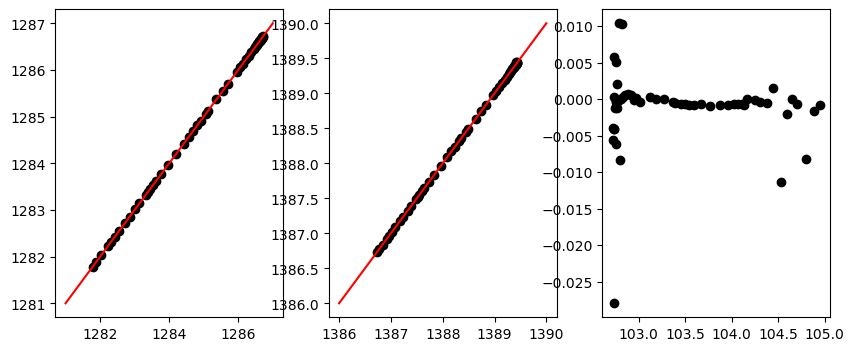

In [16]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))
ax1.plot(dfs_merge['1285cm-1'], dfs_merge['Diad1_Combofit_Cent'], 'ok')
ax1.plot([1281, 1287], [1281, 1287], '-r')

ax2.plot(dfs_merge['1389cm-1'], dfs_merge['Diad2_Combofit_Cent'], 'ok')
ax2.plot([1386, 1390], [1386, 1390], '-r')

ax3.plot(dfs_merge['∆CO2 uncorr (cm-1)'], dfs_merge['∆CO2 uncorr (cm-1)']-dfs_merge['Splitting'], 'ok')
#ax3.plot([102, 105], [102, 105], '-r')

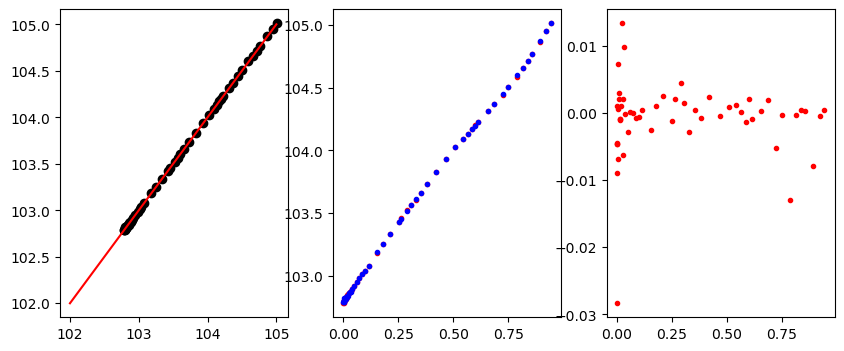

In [17]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(10,4))

ax1.plot(dfs_merge['∆CO2 corr (cm-1-Lam)'], dfs_merge['Corrected_Splitting'], 'ok')
ax1.plot([102, 105], [102, 105], '-r')

ax2.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['∆CO2 corr (cm-1-Lam)'],
         '.r')

ax2.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['Corrected_Splitting'],
         '.b')

ax3.plot(dfs_merge['Density  (g/ml)'],
         dfs_merge['∆CO2 corr (cm-1-Lam)']-dfs_merge['Corrected_Splitting'],
         '.r')

In [18]:
dfs_merge.columns

Index(['Date', 'time', 'Measurement', '1285cm-1', '1389cm-1',
       '∆CO2 uncorr (cm-1)', '∆CO2 corr (cm-1-Lam)', 'P(Mpa)', 'P(Median-MPa)',
       'P(MAD-MPa)', 'T(ID)', 'T(median)', 'T(mad)', 'Density  (g/ml)',
       '1122cm-1', '1225cm-1', '1453cm-1', '∆Ne-m (cm-1)', '∆Ne-r (cm-1)',
       '1122 r (cm-1)', '1225 r (cm-1)', '1453 r (cm-1)', 'Comments',
       'neon for corr', 'Unnamed: 0', 'Corrected_Splitting', 'filename_x',
       'Splitting', 'Diad1_Combofit_Cent', 'Diad1_Combofit_Height',
       'Diad1_Voigt_Cent', 'Diad1_Voigt_Area', 'Diad1_Voigt_Sigma',
       'Diad1_Voigt_Gamma', 'Residual_Diad1', 'Diad1_Prop_Lor', 'Diad1_fwhm',
       'Diad1_refit', 'Diad2_Combofit_Cent', 'Diad2_Combofit_Height',
       'Diad2_Voigt_Cent', 'Diad2_Voigt_Area', 'Diad2_Voigt_Sigma',
       'Diad2_Voigt_Gamma', 'Residual_Diad2', 'Diad2_Prop_Lor', 'Diad2_fwhm',
       'Diad2_refit', 'HB1_Cent', 'HB1_Area', 'HB2_Cent', 'HB2_Area',
       'C13_Cent', 'C13_Area', 'name_for_matching', 'filename_y', 

Text(0, 0.5, 'Diad2_fwhm')

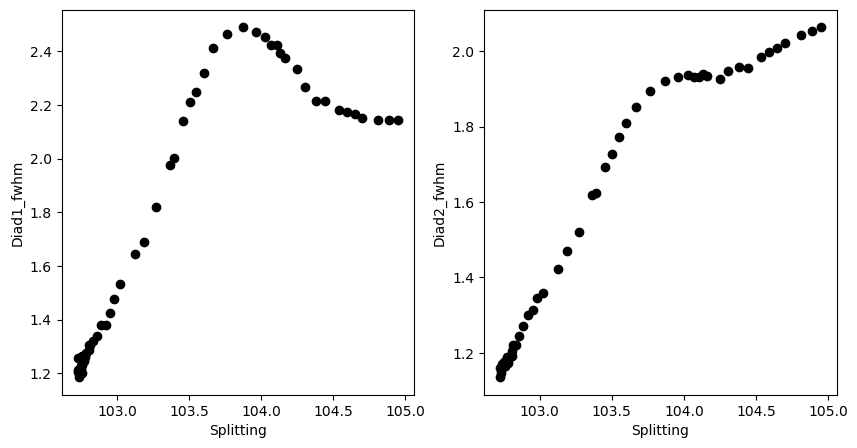

In [23]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(dfs_merge['Splitting'], dfs_merge['Diad1_fwhm'], 'ok')
#plt.xlim([100, 106])
ax1.set_xlabel('Splitting')
ax1.set_ylabel('Diad1_fwhm')

ax2.plot(dfs_merge['Splitting'], dfs_merge['Diad2_fwhm'], 'ok')
#plt.xlim([100, 106])
ax2.set_xlabel('Splitting')
ax2.set_ylabel('Diad2_fwhm')


In [31]:
dfs_merge['Diad1_Voigt_Sigma']/dfs_merge['Diad1_fwhm']

0     0.5
1     0.5
2     0.5
3     0.5
4     0.5
5     0.5
6     0.5
7     0.5
8     0.5
9     0.5
10    0.5
11    0.5
12    0.5
13    0.5
14    0.5
15    0.5
16    0.5
17    0.5
18    0.5
19    0.5
20    0.5
21    0.5
22    0.5
23    0.5
25    0.5
26    0.5
27    0.5
28    0.5
29    0.5
30    0.5
31    0.5
32    0.5
33    0.5
34    0.5
35    0.5
36    0.5
37    0.5
38    0.5
39    0.5
40    0.5
41    0.5
42    0.5
43    0.5
44    0.5
45    0.5
46    0.5
47    0.5
48    0.5
49    0.5
50    0.5
51    0.5
52    0.5
53    0.5
54    0.5
55    0.5
dtype: float64

Text(0, 0.5, 'Diad 1 fwhm')

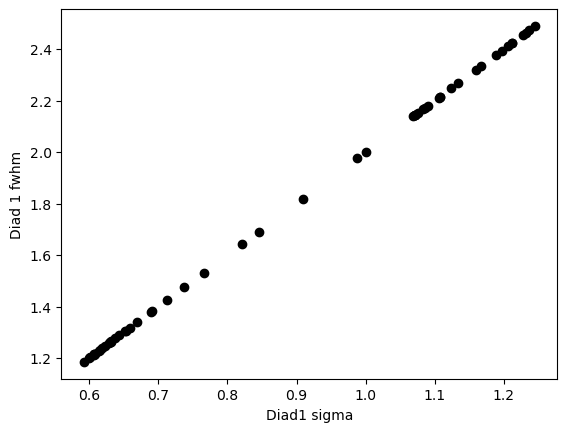

In [30]:
plt.plot(dfs_merge['Diad1_Voigt_Sigma'], dfs_merge['Diad1_fwhm'], 'ok')
plt.xlabel('Diad1 sigma')
plt.ylabel('Diad 1 fwhm')

Text(0, 0.5, 'Diad2_sigma')

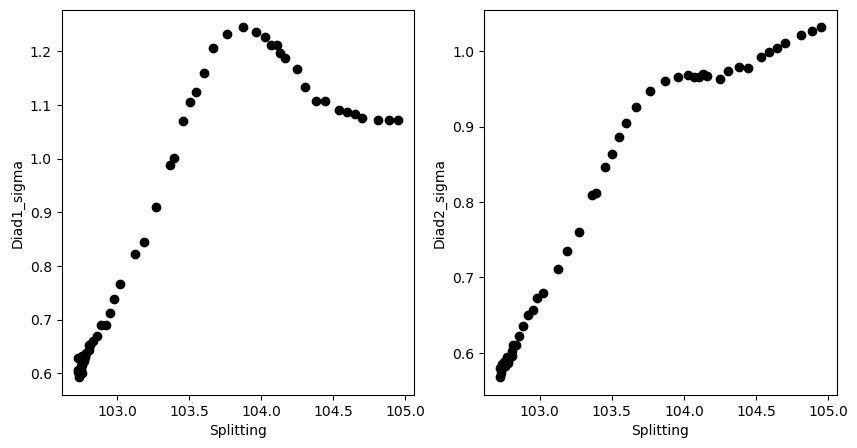

In [28]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
ax1.plot(dfs_merge['Splitting'], dfs_merge['Diad1_Voigt_Sigma'], 'ok')
#plt.xlim([100, 106])
ax1.set_xlabel('Splitting')
ax1.set_ylabel('Diad1_sigma')

ax2.plot(dfs_merge['Splitting'], dfs_merge['Diad2_Voigt_Sigma'], 'ok')
#plt.xlim([100, 106])
ax2.set_xlabel('Splitting')
ax2.set_ylabel('Diad2_sigma')


Text(0, 0.5, 'Diad1_fwhm')

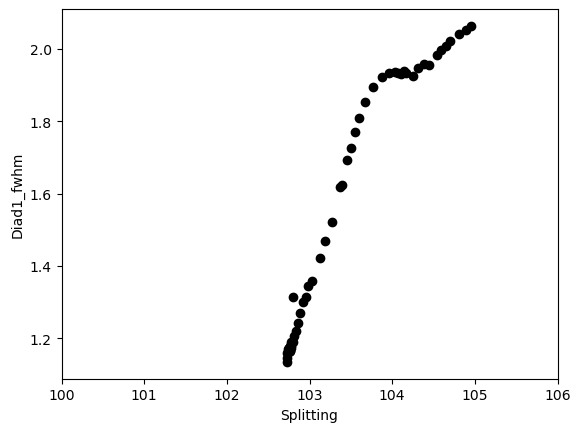

In [25]:
plt.plot(dfs_merge['Splitting'], dfs_merge['Diad2_fwhm'], 'ok')
plt.xlim([100, 106])
plt.xlabel('Splitting')
plt.ylabel('Diad1_fwhm')

In [32]:
dfs_merge.to_excel('Cell_fitting_params.xlsx')